# $B_g$ RSD direction check 
Converge tests of derivatives showed noticeable discrepancies between the average $B_g$ derivatives for the different RSD directions. This notebook is to check whether this is an issue. 

Check: 
- average $B_g$ along the different RSD directions are not substantially different
- whether differences are coming from fiducial

In [1]:
import os 
import h5py 
import numpy as np
# --- eMaNu --- 
from emanu import obvs as Obvs

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [6]:
kf = 2.*np.pi/1000. # fundmaentla mode
kmax = 0.5 

Lets start by examining $\overline{B_g}$ for the fiducial value

In [3]:
fid0 = Obvs.quijhod_Bk('fiducial', rsd=0, flag='reg', silent=False) 
fid1 = Obvs.quijhod_Bk('fiducial', rsd=1, flag='reg', silent=False) 
fid2 = Obvs.quijhod_Bk('fiducial', rsd=2, flag='reg', silent=False) 

['quijhod_B_fiducial.reg.rsd0.hdf5']
['quijhod_B_fiducial.reg.rsd1.hdf5']
['quijhod_B_fiducial.reg.rsd2.hdf5']


In [7]:
i_k, j_k, l_k = fid0['k1'], fid0['k2'], fid0['k3']
bklim = ((i_k*kf <= kmax) & (j_k*kf <= kmax) & (l_k*kf <= kmax)) # k limit 

Text(0, 0.5, '$B_g$ ratio')

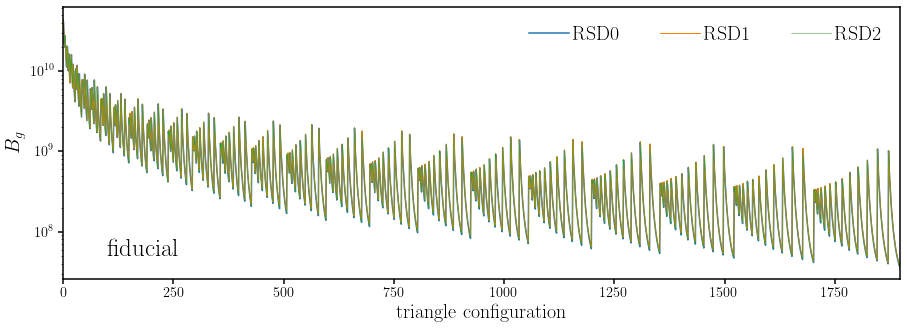

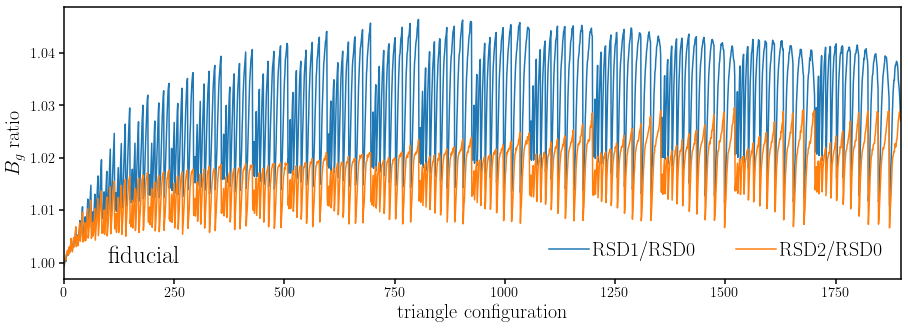

In [20]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(fid0['b123'], axis=0)[bklim], lw=1.5, label='RSD0')
sub.plot(range(np.sum(bklim)), np.average(fid1['b123'], axis=0)[bklim], lw=1, label='RSD1')
sub.plot(range(np.sum(bklim)), np.average(fid2['b123'], axis=0)[bklim], lw=0.5, label='RSD2')
sub.text(100, 5e7, 'fiducial', fontsize=25)
sub.legend(loc='upper right', ncol=3, handletextpad=0.2, fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$', fontsize=20)
sub.set_yscale('log')

fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(fid1['b123'], axis=0)[bklim]/np.average(fid0['b123'], axis=0)[bklim], label='RSD1/RSD0')
sub.plot(range(np.sum(bklim)), np.average(fid2['b123'], axis=0)[bklim]/np.average(fid0['b123'], axis=0)[bklim], label='RSD2/RSD0')
sub.legend(loc='lower right', ncol=3, handletextpad=0.2, fontsize=20)
sub.text(100, 1, 'fiducial', fontsize=25)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$ ratio', fontsize=20)

In [19]:
omm0 = Obvs.quijhod_Bk('Om_m', rsd=0, flag='reg', silent=False) 
omm1 = Obvs.quijhod_Bk('Om_m', rsd=1, flag='reg', silent=False) 
omm2 = Obvs.quijhod_Bk('Om_m', rsd=2, flag='reg', silent=False) 

['quijhod_B_Om_m.reg.rsd0.hdf5']
['quijhod_B_Om_m.reg.rsd1.hdf5']
['quijhod_B_Om_m.reg.rsd2.hdf5']


Text(0, 0.5, '$B_g$ ratio')

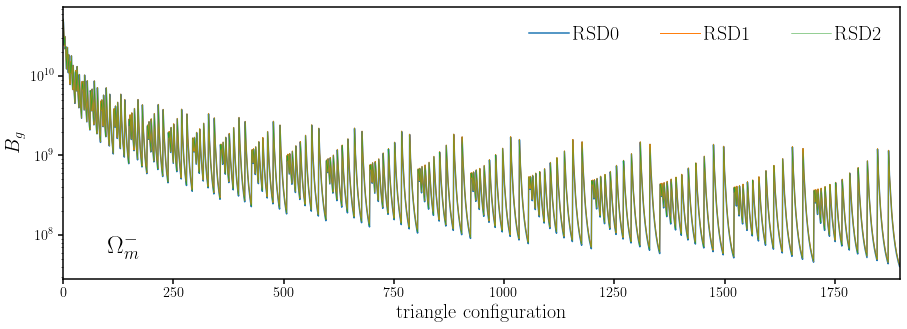

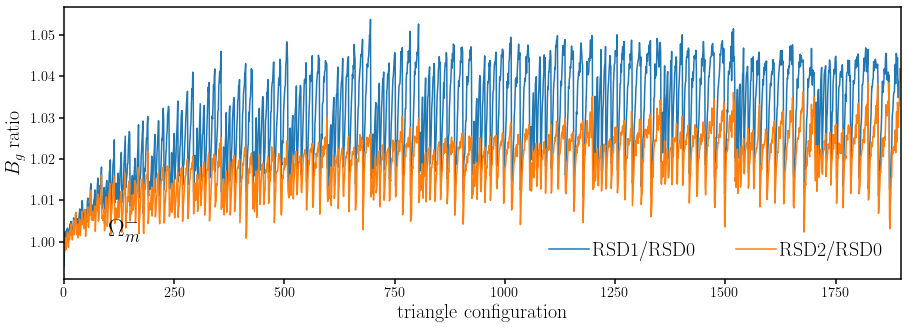

In [21]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(omm0['b123'], axis=0)[bklim], lw=1.5, label='RSD0')
sub.plot(range(np.sum(bklim)), np.average(omm1['b123'], axis=0)[bklim], lw=1, label='RSD1')
sub.plot(range(np.sum(bklim)), np.average(omm2['b123'], axis=0)[bklim], lw=0.5, label='RSD2')
sub.text(100, 5e7, '$\Omega_m^-$', fontsize=25)
sub.legend(loc='upper right', ncol=3, handletextpad=0.2, fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$', fontsize=20)
sub.set_yscale('log')

fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(bklim)), np.average(omm1['b123'], axis=0)[bklim]/np.average(omm0['b123'], axis=0)[bklim], label='RSD1/RSD0')
sub.plot(range(np.sum(bklim)), np.average(omm2['b123'], axis=0)[bklim]/np.average(omm0['b123'], axis=0)[bklim], label='RSD2/RSD0')
sub.legend(loc='lower right', ncol=3, handletextpad=0.2, fontsize=20)
sub.text(100, 1, '$\Omega_m^-$', fontsize=25)
sub.set_xlabel('triangle configuration', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$ ratio', fontsize=20)

**Yup. This seems like a bug.**